# Matplotlib - The Power of Plots 

As a senior data analyst at Pymaceuticals Inc., I have been given access to the complete data from their recent animal study. 

249 mice have been identified with SCC (Squamous Cell Carcinoma) , a commonly occuring form of skin cancer. They were treated with a variety of drug regiments. Over the course of 45 days, tumor development was observed and measured. 

This study was used to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens and to generate all of the tables and figures needed for the technical report of the study. Also a summary of the study results. 

### Dependencies and Setup

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np

# Study data files
mouse_metadata_path = os.path.join(".", "data", "Mouse_metadata.csv")
study_results_path = os.path.join(".", "data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseid_data = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])

# Display the data table for preview
mouseid_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Checking the number of mice.

In [2]:
mouseid_data['Mouse ID'].value_counts()

g989    13
v991    10
m269    10
q597    10
c264    10
        ..
t573     1
x336     1
b447     1
u153     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [3]:
duplicate_mouseid = mouseid_data[mouseid_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mouseid)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


 ### Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [4]:
clean_data = mouseid_data.loc[mouseid_data["Mouse ID"] != "g989", :]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Checking the number of mice in the clean DataFrame.

In [5]:
clean_data['Mouse ID'].value_counts()

c139    10
a275    10
o926    10
a262    10
l733    10
        ..
h428     1
o848     1
d133     1
u153     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

# Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [15]:
# Generate a summary statistics table by chaining .groupby(), .agg() and .round() methods

drug_stats = clean_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_stats

C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\shims\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


# Bar and Pie Charts

###  Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

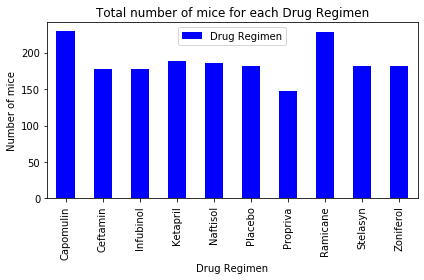

In [23]:
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = clean_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Total number of mice for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of mice")
plt.tight_layout()
# Save the figure
#plt.savefig("figures/PandaBarChart.png")

plt.show()


### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.